<a href="https://colab.research.google.com/github/Sara0894/2025-1-CD/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Pregunta 1 – Gráfico de líneas simple**

Crea un gráfico de líneas con Matplotlib que muestre la evolución de la temperatura media mensual de una ciudad durante un año.

**Datos:**

Meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

temperaturas = [22, 24, 27, 30, 32, 35, 34, 33, 30, 27, 24, 22]

**Requisitos:**
*   Línea en color rojo con marcadores circulares.
*   Título: "Temperatura media mensual".
*   Etiquetas en los ejes: "Mes" y "Temperatura (°C)".
*   Grid activado









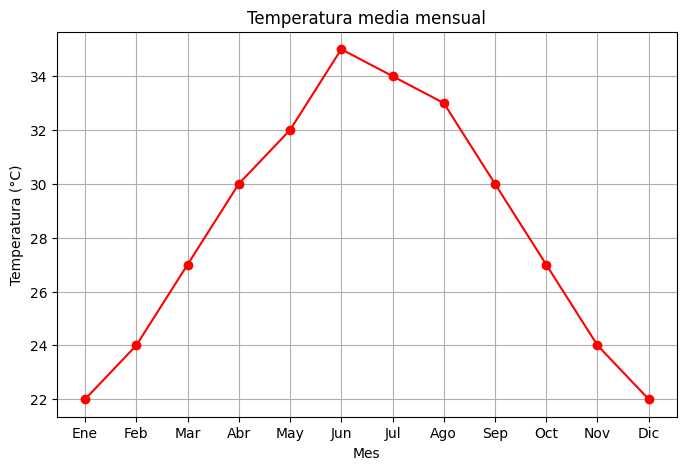

In [2]:
months = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
temperatures = [22, 24, 27, 30, 32, 35, 34, 33, 30, 27, 24, 22]

plt.figure(figsize=(8, 5))
plt.plot(months,temperatures , color='red', marker='o')
plt.title("Temperatura media mensual")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

**Pregunta 2 – Diagrama de dispersión con Seaborn**

Utilizando Seaborn, crea un scatter plot que compare la edad y el ingreso mensual de 20 personas.

**Requisitos:**
*   Los puntos deben estar diferenciados por el género usando el parámetro hue.
*   Agregar un título al gráfico.
*   Usar estilo "whitegrid" de Seaborn.









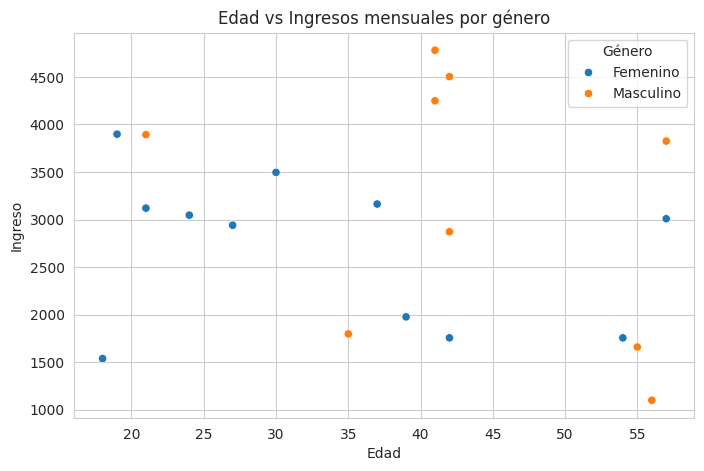

In [9]:
np.random.seed(0)
df2 = pd.DataFrame({
    'Edad': np.random.randint(18, 60, 20),
    'Ingreso': np.random.randint(1000, 5000, 20),
    'Género': np.random.choice(['Masculino', 'Femenino'], 20)
})
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Edad', y='Ingreso', hue='Género')
plt.title("Edad vs Ingresos mensuales por género")
plt.show()

**Pregunta 3 – Histograma de distribución**

Genera con Matplotlib un histograma que muestre la distribución de 200 datos aleatorios siguiendo una distribución normal con media 50 y desviación estándar 10.

**Requisitos:**
*  Mostrar 15 bins.
*  Color azul con transparencia (alpha=0.6).
* Título y etiquetas en los ejes.











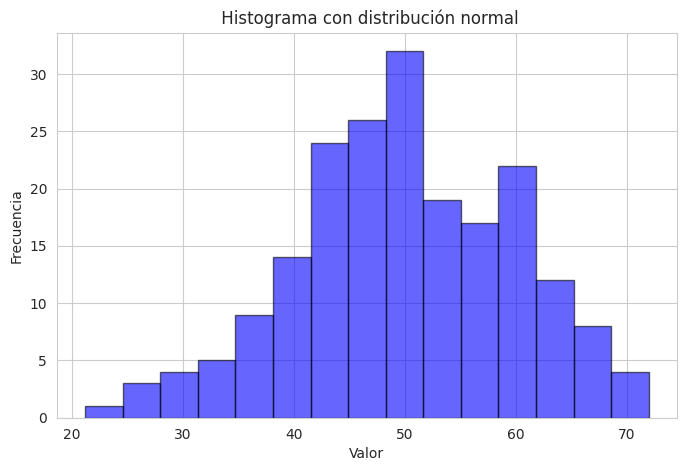

In [4]:
datos = np.random.normal(50, 10, 200)
plt.figure(figsize=(8, 5))
plt.hist(datos, bins=15, color='blue', alpha=0.6, edgecolor='black')
plt.title(" Histograma con distribución normal")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

**Pregunta 4 – Boxplot comparativo**

Usando Seaborn, genera un boxplot que compare las alturas de personas clasificadas en tres grupos: "Niños", "Adultos" y "Adultos Mayores".

**Datos de ejemplo:** Generar datos sintéticos usando numpy.random.normal con medias y desviaciones diferentes para cada grupo.

**Requisitos:**


*   Mostrar los outliers.
*   Cambiar el color de cada caja automáticamente.
*  Título: "Comparación de alturas por grupo"







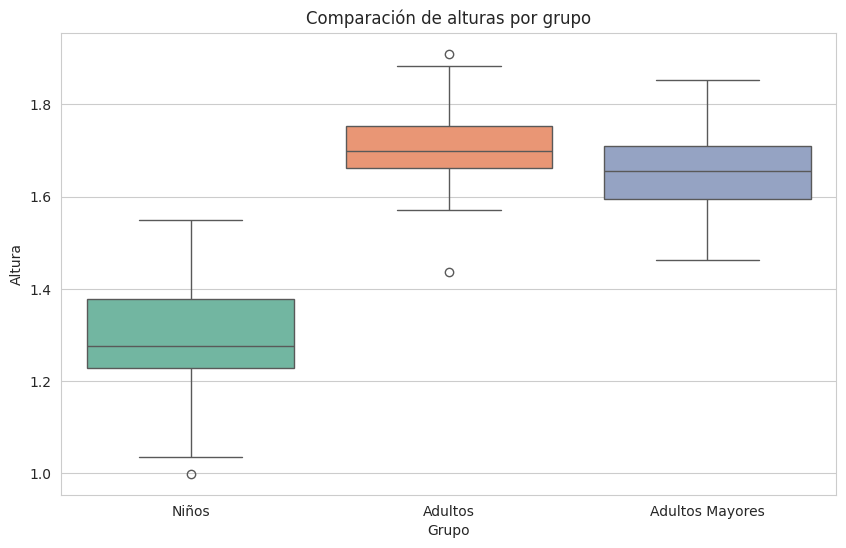

In [5]:
df4 = pd.DataFrame({
    'Altura': np.concatenate([
        np.random.normal(1.3, 0.1, 30),
        np.random.normal(1.7, 0.1, 30),
        np.random.normal(1.65, 0.08, 30)
    ]),

    'Grupo': ['Niños']*30 + ['Adultos']*30 + ['Adultos Mayores']*30
})
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


ax = sns.boxplot( x="Grupo", y="Altura",  hue="Grupo", data=df4,  palette="Set2", legend=False )
plt.title('Comparación de alturas por grupo')
plt.xlabel('Grupo')
plt.ylabel('Altura')

plt.show()

**Pregunta 5 – Gráfico combinado con Matplotlib y Seaborn**

Con un dataset sintético de ventas mensuales por región, crea un gráfico combinado que muestre:

Un gráfico de barras (Seaborn) para las ventas totales por región.
Encima, una línea (Matplotlib) que muestre el promedio móvil de ventas.
Datos sugeridos: Generar un DataFrame con columnas: Mes, Region, Ventas.

12 meses, 3 regiones (Norte, Centro, Sur), valores aleatorios entre 1000 y 5000.

**Requisitos:**

*   Eje Y: Ventas.
*   Leyenda que indique "Ventas totales" y "Promedio móvil".
*  Colores diferenciados para cada región.
*  Gráfico claro y estéticamente cuidado.








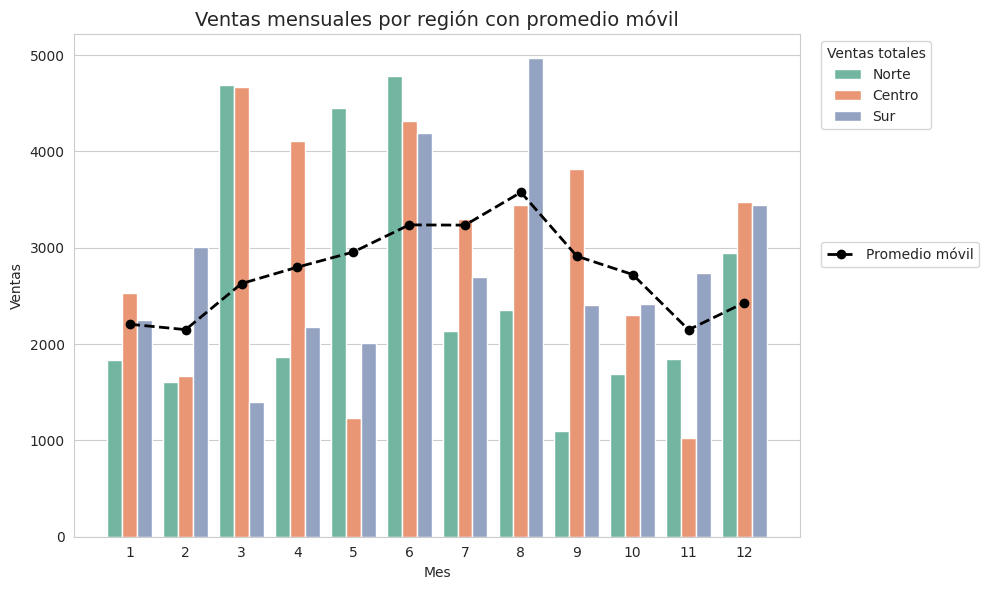

In [6]:
meses = list(range(1, 13))
regiones = ['Norte', 'Centro', 'Sur']

df5 = pd.DataFrame({
    'Mes': np.tile(meses, len(regiones)),
    'Region': np.repeat(regiones, len(meses)),
    'Ventas': np.random.randint(1000, 5000, len(meses) * len(regiones))
})


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df5, x='Mes', y='Ventas', hue='Region', palette='Set2')

df_promedio = df5.groupby('Mes')['Ventas'].mean().rolling(window=3, min_periods=1).mean()
linea, = ax.plot(df_promedio.index - 1, df_promedio.values,
                 color='black', marker='o', linestyle='--', linewidth=2,
                 label='Promedio móvil', zorder=10)

ax.set_title("Ventas mensuales por región con promedio móvil", fontsize=14)
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas")

handles, labels = ax.get_legend_handles_labels()
region_labels = ['Norte', 'Centro', 'Sur']
region_handles = [h for h, l in zip(handles, labels) if l in region_labels]
legend1 = ax.legend(region_handles, region_labels, title="Ventas totales",
                    loc='upper left', bbox_to_anchor=(1.02, 1.0))
ax.add_artist(legend1)
ax.legend([linea], ['Promedio móvil'], loc='upper left', bbox_to_anchor=(1.02, 0.6))

plt.tight_layout()
plt.show()